## Part 1

In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
#define lennard jones parameters for argon
eps = 125.7 #K
sigma = 3.345e-10 #m

#define the timestep
dt = 1e-60

#define the size of the simulation box
box_size = 5*sigma   #m

#define the number of particles 
N = 2

#define the mass of the particles
mass = 6.6335209e-30 #kg, mass of argon atom

#initial conditions
pos = np.array([[0.5*box_size, 0.5*box_size, 0.5*box_size],
              [0.5*box_size+sigma, 0.5*box_size+sigma, 0.5*box_size+sigma]])   #initial positions, particle i located in centre of box and j located a disantce of sigma away
vel = np.zeros((N, 3))   #initial velocities

#define a function to calculate the lennard jones potential
def LJ_potential(pos):                     
    return 4*eps*((sigma/pos)**12 - (sigma/pos)**6)   

#define a function to calculate the force between two particles using the differential of the lennard jones potential
def LJ_force(pos):                      
    return 24*(eps/pos)*(-2*((sigma/pos)**12) + (sigma/pos)**6)   

#define a function to calculate the net force on each particle
def calculate_forces(pos):
    F_net = np.zeros((N, 3))           #empty array for adding calculate net force to
    for i in range(N):
        for j in range(i+1, N): 
            if i != j:
                diff_pos = pos[j] - pos[i]
                pos_ij = np.sqrt(np.sum(diff_pos**2)) #find distance between particles
                F_ij = LJ_force(pos_ij) * diff_pos/pos_ij
                F_net[i] += F_ij
                F_net[j] -= F_ij
    return F_net 

def palculate_forces(pos):
    F_net = np.zeros((N, 3))           #empty array for adding calculate net force to
    for i in range(N-1):
        for j in range(i+1, N): 
            if i != j:
                diff_pos = pos[j] - pos[i]
                # Periodic interactions
                if (np.abs(diff_pos[0])>(0.5/box_size)):
                    diff_pos = diff_pos - np.copysign(1.0,Sij[l]) # If distance is greater than 0.5  (scaled units) then subtract 0.5 to find periodic interaction distance.
            
            pos_sqij = np.dot(diff_pos, diff_pos) #calculate the square of the distance
            pos_ij = np.sqrt(pos_sqij)
            if (pos_sqij < (0.5/box_size)**2):
                F_ij = LJ_force(pos_ij)
                F_net[i] += F_ij
                F_net[j] -= F_ij
    return F_net 
                   
#define a function to perform the Verlet integration scheme
def verlet_integrate(pos, vel, dt, mass):
    acc = calculate_forces(pos) / mass
    pos_new = pos + dt*vel + 0.5 * acc*dt*dt
    acc_new = (1.0/mass) * acc
    vel_new = vel + (dt/2) * (acc+acc_new)
    return pos_new, vel_new

#perform the Verlet integration for a specified number of timesteps
num_steps = 10000
position = np.zeros(num_steps)

for i in range(num_steps):
    acc = calculate_forces(pos) / mass
    pos_new = pos + dt*vel + 0.5 * acc*dt*dt
    acc_new = (1.0/mass) * acc
    vel_new = vel + (dt/2) * (acc+acc_new)
    acc = acc_new
    pos = pos_new
    vel = vel_new
    print(pos)
#for i in range(num_steps):
   # position[i] = (np.sqrt(np.sum((pos[0]-pos[1])**2)))
   # pos, vel = verlet_integrate(pos, vel, dt, mass)

position

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09 1.17075e-09 1.17075e-09]]
[[8.36250e-10 8.36250e-10 8.36250e-10]
 [1.17075e-09

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

/tmp/ipykernel_116/1591391953.py:27: RuntimeWarning: divide by zero encountered in true_divide
  return 4*eps*((sigma/pos)**12 - (sigma/pos)**6)
/tmp/ipykernel_116/1591391953.py:27: RuntimeWarning: invalid value encountered in subtract
  return 4*eps*((sigma/pos)**12 - (sigma/pos)**6)


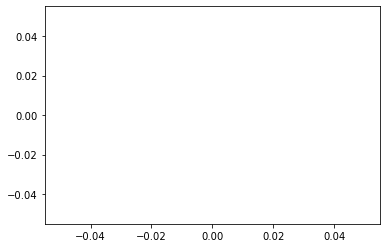

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(position, LJ_potential(position))

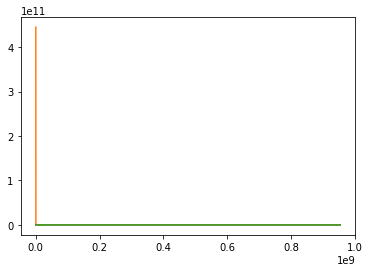

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ekb = 125.7
kb = 1.38E-23
epsilon = ekb*kb
sigma = 0.3345E-9
mass = 6.6335209E-26

N=2
L=5

init_distance = 1.5 *sigma
r = np.zeros((N,3))
r[0]=np.array([L/2,L/2,L/2])
r[1]=np.array([L/2,L/2,L/2])+init_distance*np.random.rand(3)
v=np.random.rand(N,3)

dt = 1e-15

def LJ_potential(r):
    potential = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    return potential

def LJ_force(r):
    force = 24*(epsilon/r)*((2*(sigma/r))**12-(sigma/r)**6)
    return force

def compute_forces(r):
    forces = np.zeros((N,3))
    for i in range(N):
        for j in range(N):
            if i!=j:
                dr = r[i]-r[j]
                r_ij = np.sqrt(np.sum(dr**2))
                F_ij = LJ_force(r_ij)*dr/r_ij
                forces[i] += F_ij
    return forces

def update_particles(r, v, dt):
    r_new = r + v + dt + 0.5 * dt ** 2 * compute_forces(r)/mass
    v_new = v + 0.5 * dt * (compute_forces(r) + compute_forces(r_new))/mass
    return r_new, v_new

r_plot = []
LJ_plot = []

n_steps = 10000
for i in range(n_steps):
    curr_potential = LJ_potential(np.sqrt((r[0]-r[1])**2))
    r_plot.append(np.sqrt(np.sum((r[0]-r[1])**2)))
    LJ_plot.append(curr_potential)
    r,v = update_particles(r,v,dt)

    
import matplotlib.pyplot as plt
plt.plot(r_plot, LJ_plot)

In [4]:
import numpy as np

#define lennard jones parameters for argon
eps = 125.7 #K
sigma = 3.345e-10 #m

#define the timestep
dt = 1e-60

#define the size of the simulation box
box_size = 5*sigma   #m

#define the number of particles 
N = 2

#define the mass of the particles
mass = 6.6335209e-26 #kg, mass of argon atom

#initial conditions
pos = np.array([[0.5*box_size, 0.5*box_size, 0.5*box_size],
              [0.5*box_size+sigma, 0.5*box_size+sigma, 0.5*box_size+sigma]])   #initial positions, particle i located in centre of box and j located a disantce of sigma away
vel = np.zeros((N, 3))   #initial velocities

#define a function to calculate the lennard jones potential
def LJ_potential(pos):                     
    return 4*eps*((sigma/pos)**12 - (sigma/pos)**6)   

#define a function to calculate the force between two particles using the differential of the lennard jones potential
def LJ_force(pos):                      
    return 24*(eps/pos)*(2*((sigma/pos)**12) - (sigma/pos)**6)   

DIM = 2 # Dimensions
N = 2

BoxSize = 10.0#6.35 

volume  = BoxSize**DIM
density = N / volume
print("volume = ", volume, " density = ", density)

pos = np.zeros([N,DIM])
        
pos = pos[:,:DIM]/BoxSize

MassCentre = np.sum(pos,axis=0)/N

for i in range(DIM):
    pos[:,i] = pos[:,i]-MassCentre[i]
    
def Calculate_Temperature(vel,BoxSize,DIM,N):
    
    ene_kin = 0.0
    
    for i in range(N):
        real_vel = BoxSize*vel[i,:]
        ene_kin = ene_kin + 0.5*np.dot(real_vel,real_vel)
    
    ene_kin_aver = 1.0*ene_kin/N
    temperature = 2.0*ene_kin_aver/DIM
    
    return ene_kin_aver,temperature

def Compute_Forces(pos,acc,ene_pot,epsilon,BoxSize,DIM,N):
    # Compute forces on positions using the Lennard-Jones potential
    # Uses double nested loop which is slow O(N^2) time unsuitable for large systems
    Sij = np.zeros(DIM) # Box scaled units
    Rij = np.zeros(DIM) # Real space units
    
    #Set all variables to zero
    ene_pot = ene_pot*0.0
    acc = acc*0.0
    virial=0.0
    
    # Loop over all pairs of particles
    for i in range(N-1):
        for j in range(i+1,N): #i+1 to N ensures we do not double count
            Sij = pos[i,:]-pos[j,:] # Distance in box scaled units
            for l in range(DIM): # Periodic interactions
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l] - np.copysign(1.0,Sij[l]) # If distance is greater than 0.5  (scaled units) then subtract 0.5 to find periodic interaction distance.
            
            Rij = BoxSize*Sij # Scale the box to the real units in this case reduced LJ units
            Rsqij = np.dot(Rij,Rij) # Calculate the square of the distance
            Rcutoff = 0.5
            
            if(Rsqij < Rcutoff**2):
                # Calculate LJ potential inside cutoff
                # We calculate parts of the LJ potential at a time to improve the efficieny of the computation (most important for compiled code)
                rm2 = 1.0/Rsqij # 1/r^2
                rm6 = rm2**3.0 # 1/r^6
                rm12 = rm6**2.0 # 1/r^12
                phi = epsilon*(4.0*(rm12-rm6)-phicutoff) # 4[1/r^12 - 1/r^6] - phi(Rc) - we are using the shifted LJ potential
                # The following is dphi = -(1/r)(dV/dr)
                dphi = epsilon*24.0*rm2*(2.0*rm12-rm6) # 24[2/r^14 - 1/r^8]
                ene_pot[i] = ene_pot[i]+0.5*phi # Accumulate energy
                ene_pot[j] = ene_pot[j]+0.5*phi # Accumulate energy
                virial = virial + dphi*np.sqrt(Rsqij) # Virial is needed to calculate the pressure
                acc[i,:] = acc[i,:]+dphi*Sij # Accumulate forces
                acc[j,:] = acc[j,:]-dphi*Sij # (Fji=-Fij)
    return acc, np.sum(ene_pot)/N, -virial/DIM # return the acceleration vector, potential energy and virial coefficient

# Setting up the simulation
NSteps=10000 # Number of steps
deltat = 0.0032 # Time step in reduced time units
TRequested = 0.5# #Reduced temperature
DumpFreq = 100 # Save the position to file every DumpFreq steps
epsilon = 1.0 # LJ parameter for the energy between particles

# Main MD loop
def main(pos,NSteps,deltat,TRequested,DumpFreq,epsilon,BoxSize,DIM):
    
    # Vectors to store parameter values at each step
    N = np.size(pos[:,1])
    ene_kin_aver = np.ones(NSteps)
    ene_pot_aver = np.ones(NSteps)
    temperature = np.ones(NSteps)
    virial = np.ones(NSteps)
    pressure = np.ones(NSteps)
    ene_pot = np.ones(N)
    position =np.ones(NSteps)

    vel = (np.random.randn(N,DIM)-0.5)
    acc = (np.random.randn(N,DIM)-0.5)

    # Open file which we will save the outputs to
    f = open('traj.xyz', 'w')
    
    for k in range(NSteps):
        
        # Refold positions according to periodic boundary conditions
        for i in range(DIM):
            period = np.where(pos[:,i] > 0.5)
            pos[period,i]=pos[period,i]-1.0
            period = np.where(pos[:,i] < -0.5)
            pos[period,i]=pos[period,i]+1.0

        # r(t+dt) modify positions according to velocity and acceleration
        pos = pos + deltat*vel + 0.5*(deltat**2.0)*acc # Step 1

        # Calculate temperature
        ene_kin_aver[k],temperature[k] = Calculate_Temperature(vel,BoxSize,DIM,N)

        # Rescale velocities and take half step
        chi = np.sqrt(TRequested/temperature[k])
        vel = chi*vel + 0.5*deltat*acc # v(t+dt/2) Step 2

        # Compute forces a(t+dt),ene_pot,virial
        acc, ene_pot_aver[k], virial[k] = Compute_Forces(pos,acc,ene_pot,epsilon,BoxSize,DIM,N) # Step 3

        # Complete the velocity step 
        vel = vel + 0.5*deltat*acc # v(t+dt/2) Step 4

        # Calculate temperature
        ene_kin_aver[k],temperature[k] = Calculate_Temperature(vel,BoxSize,DIM,N)

        # Calculate pressure
        pressure[k]= density*temperature[k] + virial[k]/volume
        
      
    return ene_kin_aver, ene_pot_aver, temperature, pressure, position

ene_kin_aver, ene_pot_aver, temperature, pressure, pos = main(pos,NSteps,deltat,TRequested,DumpFreq,epsilon,BoxSize,DIM)

volume =  100.0  density =  0.02


NameError: name 'phicutoff' is not defined

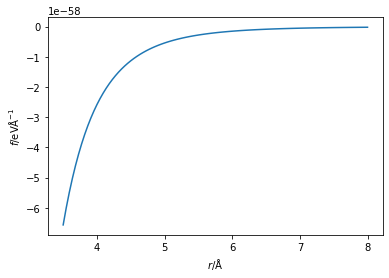

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def lj_force(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the force of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond 
        length (eV)
    sigma: float 
        Distance at which the potential energy is 
        zero (Å)
    
    Returns
    -------
    float
        Force of the van der Waals interaction (eV/Å)
    """
    return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)
    
r = np.linspace(3.5, 8, 100)
plt.plot(r, LJ_force(r))
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$f$/eVÅ$^{-1}$')
plt.show()

In [ ]:
r
